# NAMA: RICHKY ABEDNEGO

# NIM: 5312422025

# PRODI: TEKKOM 22

In [2]:
!pip install scikit-dsp-comm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\richk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Menginstall modul library scikit-dsp-comm

In [3]:
%pylab inline
#%pylab notebook # for plots editable inthe notebook
#%matplotlib qt # for popout plots
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


List  di atas berfungsi untuk mengimpor berbagai modul dan pustaka yang diperlukan untuk pemrosesan sinyal digital. Baris pertama, `%pylab inline`, mengatur matplotlib agar menampilkan grafik langsung dalam notebook. Kode ini kemudian mengimpor modul `sigsys`, `fir_design_helper`, `iir_design_helper`, dan `multirate_helper` dari pustaka `sk_dsp_comm`, yang menyediakan fungsi untuk analisis dan desain filter sinyal digital (baik FIR maupun IIR) serta pemrosesan multirate. Modul `scipy.signal` diimpor untuk memanfaatkan fungsi-fungsi pemrosesan sinyal dari SciPy. Modul `Audio` dan `display` dari `IPython.display` digunakan untuk menampilkan audio dan gambar dalam notebook.

In [4]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX


Mengatur konfigurasi gambar yang akan ditampilkan. Baris `%config InlineBackend.figure_formats=['svg']` mengatur agar gambar yang dihasilkan oleh matplotlib ditampilkan dalam format SVG (Scalable Vector Graphics), yang menawarkan skalabilitas dan kejernihan yang baik saat diperbesar. Sebagai alternatif, baris `%config InlineBackend.figure_formats=['pdf']` memungkinkan gambar ditampilkan dalam format PDF, yang cocok untuk kebutuhan kualitas tinggi dan presisi dalam cetakan atau dokumen elektronik.

In [5]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

Code diatas bertujuan untuk merancang dua filter low-pass FIR berbeda. Fungsi firwin_kaiser_lpf memerlukan parameter cut-off frequency, dalam contoh ini 1/8, Lebar transisi 1/6, jumlah tap filter 50, dan faktor pengali amplitudo 1.0. Fungsi fir_remez_lpf menerima parameter serupa: cut-off frequency 1/8, Lebar trahsisi 1/6, toleransi noise 0.2, jumlah tap filter 50, dan faktor pengali amplitudo (1.0). Variabel b_k mewakilkan metode Kaiser window, sedangkan  Variabel b_r mewakilkan metode Parks-McClellan atau Remez exchange algorithm,

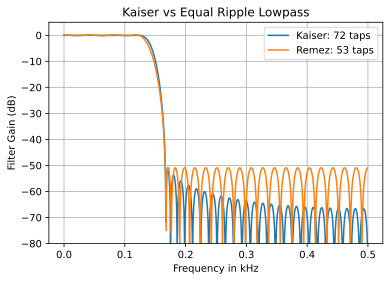

In [6]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Program ini menampilkan respon frekuensi dari dua filter low-pass FIR yang telah dirancang sebelumnya, yaitu b_k dan b_r. Untuk menghitung dan menampilkan respon frekuensi dari kedua filter dalam satuan dB, digunakan fungsi fir_d.freqz_resp_list dengan parameter fs=1 untuk menormalkan frekuensi sampling. Selanjutnya, batas sumbu y diatur dari -80 dB hingga 5 dB menggunakan perintah ylim([-80,5]).

Menghitung Respon Frekuensi Filter:
Program ini pertama-tama menghitung respon frekuensi dari dua filter digital yang berbeda, yaitu filter Kaiser dan filter Remez. Untuk melakukan ini, program menggunakan fungsi dari suatu modul khusus filter digital. Fungsi ini menerima koefisien dari kedua filter sebagai input dan menghitung bagaimana setiap filter merespons berbagai frekuensi. Hasil perhitungan respon frekuensi ini akan ditampilkan dalam satuan desibel (dB) dan diukur dengan frekuensi sampling yang telah dinormalisasi.

Mengatur Rentang Sumbu Y:
Selanjutnya, program mengatur batasan untuk sumbu y pada grafik sehingga hanya nilai antara -80 dB hingga 5 dB yang akan ditampilkan. Ini membantu dalam fokus pada area penting dari respon frekuensi.

Memberikan Judul pada Grafik:
Program memberikan judul pada grafik yang menjelaskan bahwa grafik tersebut adalah perbandingan antara filter lowpass Kaiser dan filter lowpass Equal Ripple (Remez).

Memberikan Label pada Sumbu Y:
Label pada sumbu y ditambahkan untuk menunjukkan bahwa nilai yang diplot adalah penguatan filter dalam satuan desibel (dB).

Memberikan Label pada Sumbu X:
Label pada sumbu x ditambahkan untuk menunjukkan bahwa sumbu ini mewakili frekuensi dalam kilohertz (kHz).

Menambahkan Legenda:
Program menambahkan legenda pada grafik untuk membedakan antara dua filter yang dibandingkan. Legenda ini menunjukkan berapa banyak taps (koefisien filter) yang dimiliki oleh masing-masing filter, yaitu filter Kaiser dan filter Remez. Penempatan legenda diatur secara otomatis pada posisi terbaik di dalam grafik.

Menambahkan Grid pada Grafik:
Terakhir, program menambahkan grid pada grafik. Penambahan grid ini memudahkan pembacaan dan interpretasi nilai-nilai pada grafik.

In [7]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

Code menunjukkan perancangan dua filter high-pass FIR. Metode yang digunakan adalah metode kaiser window (b_k_hp) dan metode remez (b_r_hp)

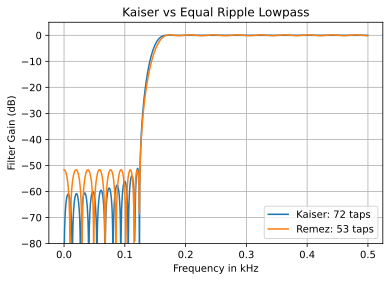

In [8]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

Program ini juga menghasilkan output berupa tampilan respon frekuensi dari dua filter high-pass FIR yang telah dirancang sebelumnya, yaitu b_k_hp dan b_r_hp. Untuk menampilkan perhitungan respon frekuensi dari kedua filter tersebut dalam satuan dB, digunakan fungsi fir_d.freqz_resp_list, dengan fs=1 sebagai parameter untuk normalisasi frekuensi sampling. Selanjutnya, batas sumbu y diatur dari -80 dB hingga 5 dB menggunakan perintah ylim([-80,5]).

Output yang dihasilkan adalah sebuah plot yang menampilkan respon frekuensi dari dua filter high-pass FIR, yaitu filter Kaiser dan filter Equal Ripple (Remez). Plot tersebut menunjukkan bagaimana respons filter terhadap berbagai frekuensi, dengan nilai penguatan (gain) dalam satuan desibel (dB) pada sumbu y dan frekuensi dalam kilohertz (kHz) pada sumbu x. Di atas plot, terdapat judul "Kaiser vs Equal Ripple Lowpass" yang menerangkan perbandingan antara filter Kaiser dan Equal Ripple (Remez). Sumbu y diberi label "Filter Gain (dB)" untuk menandakan bahwa nilai-nilai pada sumbu tersebut mengindikasikan penguatan filter dalam dB. Sumbu x diberi label "Frequency in kHz" untuk menandakan bahwa nilai-nilai pada sumbu tersebut adalah frekuensi dalam kHz.

Legenda di dalam plot memberikan informasi tentang jumlah taps (koefisien) dari filter Kaiser dan Remez, tetapi ada kesalahan penulisan yang menyebabkan variabel len(b_k) dan len(b_r) tidak terdefinisi dengan benar. Grid juga ditambahkan pada plot untuk mempermudah pembacaan nilai-nilai pada grafik.

In [9]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

Setelah merancang low-pass dan high-pass filter, kode diatas merancang band-pass FIR dengan kedua metode yaitu metode kaiser window dan remez window.

b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000): Ini adalah panggilan fungsi firwin_kaiser_bpf dari modul fir_d. Fungsi ini digunakan untuk merancang filter band-pass FIR menggunakan metode desain Kaiser. Argumen-argumennya adalah sebagai berikut:

7000 dan 8000 adalah batas bawah dan atas dari band-pass filter yang diinginkan.

14000 dan 15000 adalah batas bawah dan atas dari band-stop filter yang diinginkan (sinyal yang ingin diredam).

50 adalah lebar daerah transisi antara band-pass dan band-stop, yang menunjukkan seberapa cepat filter berubah dari membiarkan frekuensi melewati ke memblokirnya.

48000 adalah frekuensi sampling.


b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000): Ini adalah panggilan fungsi fir_remez_bpf dari modul fir_d. Fungsi ini digunakan untuk merancang filter band-pass FIR menggunakan metode desain Remez (atau metode equiripple). Argumen-argumennya adalah sebagai berikut:

7000 dan 8000 adalah batas bawah dan atas dari band-pass filter yang diinginkan.

14000 dan 15000 adalah batas bawah dan atas dari band-stop filter yang diinginkan (sinyal yang ingin diredam).

0.2 adalah maksimum toleransi dalam daerah band-stop, yang menunjukkan seberapa besar keinginan untuk meminimalkan gangguan di daerah tersebut.

50 adalah lebar daerah transisi antara band-pass dan band-stop, yang menunjukkan seberapa cepat filter berubah dari membiarkan frekuensi melewati ke memblokirnya.

48000 adalah frekuensi sampling.

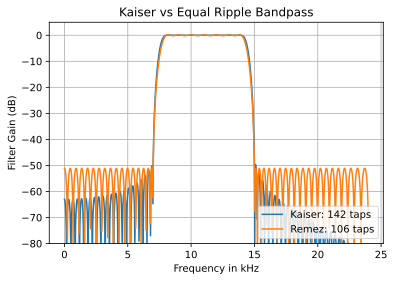

In [10]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

Kode di atas tidak hanya merancang dua filter band-pass FIR menggunakan metode Kaiser dan metode Remez, tetapi juga menampilkan respon frekuensi dari kedua filter tersebut. Untuk melakukan ini, digunakan fungsi fir_d.freqz_resp_list, yang menghitung dan menampilkan respons frekuensi dari filter dalam satuan desibel (dB). Frekuensi sampling sebesar 48 kHz diambil ke dalam pertimbangan melalui parameter fs=48. Selanjutnya, batas sumbu y diatur dari -80 dB hingga 5 dB menggunakan ylim([-80,5]).

In [11]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

Kode tersebut adalah untuk merancang filter low-pass FIR dengan menggunakan metode Remez. Filter tersebut memiliki parameter-parameter sebagai berikut: frekuensi cut-off 3300 Hz, frekuensi stopband 4300 Hz, toleransi ripple 0.5 dB, jumlah tap filter 60, dan frekuensi sampling 96000 Hz.

In [12]:
mr_up = mrh.multirate_FIR(b_up)

Dengan menggunakan filter yang telah dirancang sebelumnya, variabel mr_up akan memfasilitasi penggunaan filter dalam berbagai aplikasi pemrosesan sinyal multirate, seperti resampling atau interpolasi. Ini berarti filter tersebut dapat digunakan untuk mengubah laju sampel suatu sinyal, menggabungkan atau memperluas jumlah sampel dalam sinyal, atau melakukan proses pemrosesan sinyal lainnya yang melibatkan manipulasi laju sampel.

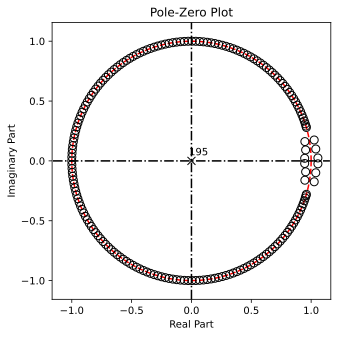

In [13]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Program diatas memvisualisasikan diagram dari pola pole-zero dengan filter FIR yang telah didefinisikan.

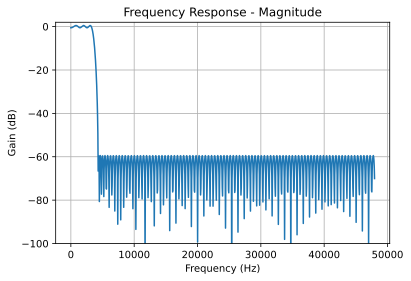

In [14]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)

Dalam kode yang disebutkan sebelumnya, digunakan perintah mr_up.freq_resp('db', 96000) untuk menghitung dan menampilkan respons frekuensi dari filter FIR dalam skala desibel, dengan frekuensi sampel yang ditetapkan pada 96000 Hz. Ini memungkinkan untuk mengevaluasi bagaimana filter tersebut merespons terhadap berbagai frekuensi dengan memvisualisasikan penguatan atau penurunan sinyal pada frekuensi-frekuensi tertentu dalam bentuk dB, sehingga mempermudah analisis karakteristik filter tersebut dalam domain frekuensi.

In [15]:
(len(b_up-1))/2

98.0

Program menunjukkan perhitungan setengah panjang filter FIR dilakukan terhadap kode sebelumnya. Nilai hasilnya, yaitu 98,0, mencerminkan jarak dari pusat filter ke tepi, yang merupakan parameter krusial dalam menentukan waktu tunda dan karakteristik filter. Informasi ini membantu untuk memahami seberapa luas respons filter di sepanjang domain waktu dan frekuensi, serta memperkirakan seberapa efektif filter tersebut dalam menghilangkan komponen-komponen yang tidak diinginkan dari sinyal.

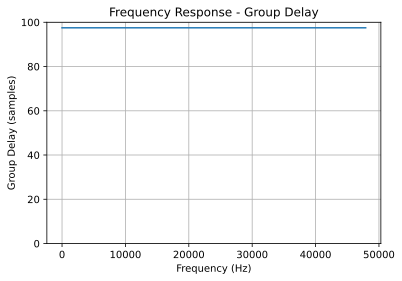

In [16]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])


Kode tersebut menggunakan perintah mr_up.freq_resp('groupdelay_s',96000,[0,100]) untuk menghitung dan menampilkan waktu tunda grup dari filter FIR dalam satuan detik pada rentang frekuensi 0 Hz hingga 100 Hz, dengan frekuensi sampel 96000 Hz.

In [17]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

Kode menunjukkan contoh  filter low-pass IIR dari berbagai metode. Untuk frekuensi sampling fs sebesar 48000 Hz, m:etode-metode yang digunakan adalah Filter Butterworth (b_but, a_but, sos_but), Chebyshev tipe 1 (b_cheb1, a_cheb1, sos_cheb1), Chebyshev tipe 2 (b_cheb2, a_cheb2, sos_cheb2), dan elliptic (b_elli, a_elli, sos_elli) dirancang dengan parameter cut-off frequency f_pass, stopband frequency f_stop, toleransi noise 0.5 dB, dan orde 60.

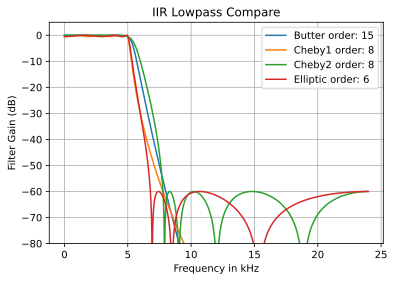

In [18]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Kode menampilkan perbandingan respon frekuensi dari empat filter low-pass IIR yang didefinisikan pada code sebelumnya. Fungsi iir_d.freqz_resp_cas_list digunakan untuk menghitung dan menampilkan respons frekuensi dari masing-masing filter dalam dB, dengan parameter fs=48 untuk memperhitungkan frekuensi sampling sebesar 48 kHz. Batas y-axis ditetapkan dari -80 dB hingga 5 dB dengan ylim([-80,5]).

(15, 15)

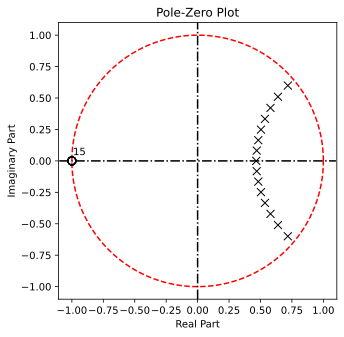

In [19]:
iir_d.sos_zplane(sos_but)


Pada code diatas, Fungsi iir_d.sos_zplane(sos_but) digunakan untuk menampilakan diagram pole-zero untuk filter IIR yang direpresentasikan dalam bentuk sekumpulan orde-kedua (second-order sections).

In [20]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)


Code diatas mendefinisikan sebuah filter low-pass IIR dengan menggunakan metode elliptic dengan parameter cut-off frequency 1950 Hz, stopband frequency 2050 Hz, toleransi noise 0.5 dB, orde 80, dan frekuensi sampling 8000 Hz.

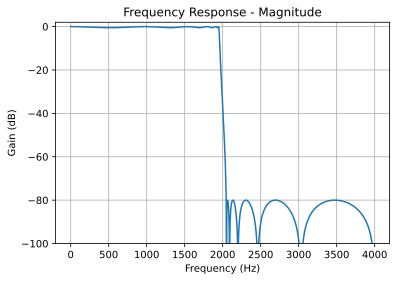

In [21]:
mr_lp.freq_resp('db',8000)

Menghitung dan menampilkan respons frekuensi dari filter IIR low-pass yang telah didefinisikan sebelumnya dalam skala desibel pada frekuensi sampel 8000 Hz.

(-130.0, -30.0)

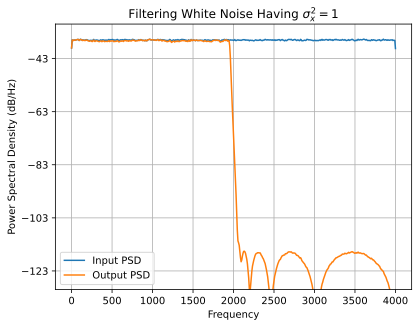

In [22]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

Code diatas melakukan filtering dari sinyal white noise x menggunakan filter low-pass IIR yang telah dirancang sebelumnya (mr_lp). Kemudian, spektrum daya (PSD) dari sinyal input dan output ditampilkan menggunakan fungsi psd, dengan jendela Welch dengan panjang 2^10 dan frekuensi sampling 8000 Hz.

In [23]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


Mengkalkulasi nilai serta mencetak nilai spektral daya yang diharapkan dari sinyal putih (white noise) pada frekuensi sampling 8000 Hz, diukur dalam dB/Hz.

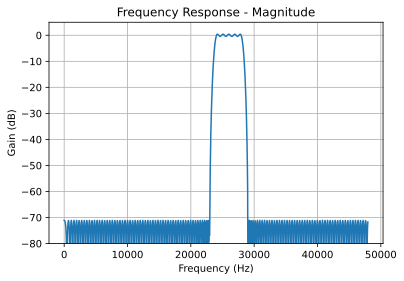

In [24]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();


Kode di atas membuat sebuah filter FIR band-pass menggunakan metode Remez. Filter ini diatur dengan batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple sebesar 0.5, orde 70, dan frekuensi sampel 96000 Hz.

Setelah filter dibuat, respons frekuensi dari filter tersebut diplot dalam skala dB menggunakan fungsi freqz_resp_list dari modul fir_d. Rentang sumbu y diatur dari -80 dB hingga 5 dB, dan grid diaktifkan untuk memudahkan analisis grafik.

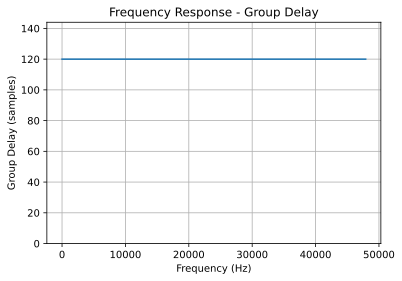

In [25]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Menampilkan plot respons waktu delay grup dari filter FIR band-pass yang telah didefinisikan sebelumnya dengan menggunakan metode Remez.

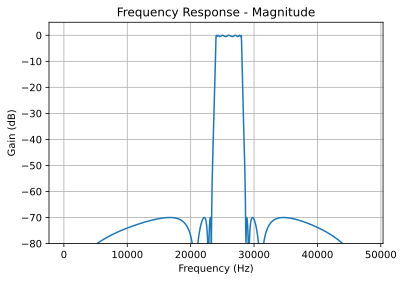

In [26]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

code diatas mendefinisikan dan memplot filter band-pass IIR dengan menggunakan metode elliptic, dengan parameter batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple 0.5 dB, orde 70, dan frekuensi sampling 96000 Hz.

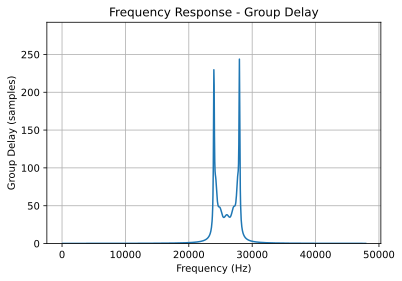

In [27]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

Program di atas menunjukkan plot respons waktu delau grup dari filter band-pass II menggunakan metode elliptic.


Code tersebut menggunakan fungsi freqz_resp_cas_list dari modul iir_d dengan parameter sos_rec_bpf2 sebagai filter yang diterapkan pada sinyal, untuk menghasilkan respon frekuensi dari filter tersebut dalam bentuk group delay (delay kelompok). Argumen mode='groupdelay_s' digunakan untuk menentukan bahwa yang ingin diplot adalah group delay dari sistem. fs=96000 menentukan frekuensi sampel dari sinyal yang digunakan.

Perintah with np.errstate(divide='ignore', invalid='ignore'): digunakan untuk mengabaikan peringatan yang muncul jika terjadi pembagian dengan nol atau operasi lain yang menghasilkan nilai yang tidak terdefinisi (misalnya, hasil tak hingga atau NaN).